# Homework 11

INSERT YOUR NAME HERE

__Directions:__ Add work to this notebook to solve the problems below.

Be careful to name the objects you create as described in the problem. Some problems may include some tests you can run to test your code.

This assignment will not be collected.

Some problems are derived from problems in these books:
* __LL__: *Programming for Computations - Python* by Svein Linge and Hans Petter Langtangen, 2nd edition.
* __L__: *A Primer on Scientific Programming with Python* by Hans Petter Langtangen, 2nd edition.
* __TAK__: *Applied Scientific Computing With Python* by Peter R. Turner, Thomas Arildsen, and Kathleen Kavanagh.

### Standard imports

In [ ]:
import numpy as np
import math as m
from numpy import random
import matplotlib.pyplot as plt
import random as random_number

## 1. Random points in the disk

There are various coordinate schemes for points in the unit disk. You have learned about polar coordinates, which is governed by the map
$$P(r, \theta) = (r \cos \theta, r \sin \theta).$$
The image of the rectangle
$$\{(r,\theta):~0 \leq r \leq 1 \quad \text{and} \quad 0 \leq \theta \leq 2 \pi\}$$
under $P$ is the unit disk in the plane. However $r$ uniformly at random in $[0, 1]$ and $\theta$ uniformly at random in $[0, 2 \pi]$, then the corresponding distribution on points in the unit disk is not uniform: Points tend to cluster near the origin, as illustrated below.

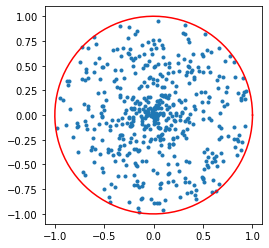

In [2]:
num_points = 500
r = random.random(num_points)
theta = 2 * np.pi * random.random(num_points)
plt.axes().set_aspect(1)
plt.plot(r * np.cos(theta), r * np.sin(theta), ".")
circle_param = np.linspace(0, 2*np.pi, 200)
plt.plot(np.cos(circle_param), np.sin(circle_param), "r")
plt.show()

The reason for this non-uniformity is that the [Jacobian determinant](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) is non-constant. As a review: the Jacobian is the matrix of partial derivatives. For $P$, the coordinate functions are $x=r \cos \theta$ and $y = r \sin \theta$. The Jacobian is the matrix 
$$\left(\begin{matrix} 
\frac{\partial x}{\partial r} & \frac{\partial x}{\partial \theta} \\
\frac{\partial y}{\partial r} & \frac{\partial y}{\partial \theta}
\end{matrix}\right),$$
and its determinant is $r$, which shows up in the Polar coordinates formula for integration, $dA = r~dr~d\theta.$

A simple modification of the polar coordinates formula fixes this. Define
$$F(u, \theta) = (\sqrt{u} \cos \theta, \sqrt{u} \sin \theta).$$
Then the determinant of the Jacobian is the constant $\frac{1}{2}$. The unit disk is the image of the rectangle
$$R = \{(u,\theta):~0 \leq u \leq 1 \quad \text{and} \quad 0 \leq \theta \leq 2 \pi\}$$
under $F$. This means that a uniformly random point in the circle can be determined by choosing a point $(u, \theta)$ in the rectangle $R$ uniformly at random and then taking the image of this point under $F$.

**Problem.** Write a function `random_point_in_disk()` which takes no input and returns a point uniformly at random in the unit disk. The returned points should numpy arrays with two elements, e.g., `np.array([x,y])`.

To check your answer, you can modify the above code it plot $500$ random points returned by your function. The plotted points should look more uniform then the above points.

## 2. Monte Carlo Integration in the disk

Write a function `integrate(f, n)` which takes as input a function `f` and a positive integer `n`. The function `f(x,y)` should take two floating point real numbers as inputs and return a floating point real number.

The function `integrate(f, n)` should return an estimate for the integral of $f$ over the unit disk, 
$$\int_D f(x,y)~dA.$$
The estimate should be obtained using Monte Carlo Integration using $n$ points taken uniformly from the unit disk. You can make use of the `random_point_in_disk()` function written for problem 1.

**Tests for your code:**

Here we test your code by estimating the volume of the unit sphere in ${\mathbb R}^3$.
If programmed correctly, this should almost always work.

In [ ]:
def f(x, y):
    return 2 * np.sqrt(1 - x**2 - y**2)

error = abs(integrate(f, 10000) - 4/3*np.pi)

print("The absolute error in your estimate is {:0.5f}".format(error))

if error < 0.05:
    print("Great! Your answer is reasonable.")
else:
    print("Oops. The integral estimate seems to have way to much error.")

## 3. Estimating areas

Suppose $f:D \to \{\mathbb R\}$ is a function sending points in unit disk $D$ to the real numbers. Then $D$ determines a region $R_f$ contained in the unit disk:
$$R_f = \{(x,y) \in D:~f(x,y) \leq 0.\}$$

Write a function `area(f, n)` which uses Monte Carlo integration to estimate the area of $R_f$ using $n$ points in the unit disk $D$. As in the previous problem, `f(x,y)` should be a function taking two floating point real numbers as inputs and should return a floating point real number. The number $n$ should be a positive integer.

**Tests for your code:**

The region $R_f$ associated to the function
$$f(x,y)=|x|+|y|-1$$
is the square whose verices are $(\pm 1,0)$ and $(0, \pm 1)$. This square has area $2$. 
Here is a related test:

In [ ]:
# If programmed correctly, this should almost always work.
def f(x, y):
    return np.abs(x) + np.abs(y) - 1

error = abs(area(f, 10000) - 2)

print("The absolute error in your estimate is {:0.6f}".format(error))

if error < 0.02:
    print("Great! Your answer is reasonable.")
else:
    print("Oops. The integral estimate seems to have way to much error.")

## 4. Center of mass

The center of mass of a region $R$ in the plane is $(X/A, Y/A)$ where $A$ is the area of the region, and $X$ and $Y$ are obtained by integration with respect to area,
$$X = \iint_R x~dA \quad \mathrm{and} \quad Y = \iint_R y~dA.$$

A region can be described by a real-valued function `f(x,y)` defined on the plane. The region determined by $f$ is 
$$R = \{(x,y):~f(x,y) \leq 0\}.$$

Write a function `center_of_mass(f, n)` which takes as input a function `f(x,y)` determining a region $R$ as above and an integer $n \geq 1$. The region $R$ must be contained in the square $[-1, 1] \times [-1, 1]$. Your program should estimate the quantitites $A$, $X$ and $Y$ by applying the Monte Carlo integration technique with $n$ points in the box $[-1, 1] \times [-1, 1]$. The function should return the estimated center of mass $(X/A, Y/A)$ as a pair.

You may not use integration functions built into python.


**Tests for your code:**

A test for your code is given below. Monte Carlo integration is random, but this test should pass with high probability.

In [ ]:
# Circle centered at (1/4,-1/3) of radius 1/2.
def f(x,y):
    return (x-1/4)**2 + (y+1/3)**2 - 1/4
(mx,my) = center_of_mass(f, 10000)
print("The center of mass was computed to be ({:.3f}, {:.3f})." \
     .format(mx, my))
# compute the distance from the center of the circle
error = m.sqrt((mx-1/4)**2 + (my+1/3)**2)
assert error < 0.03, \
    "The error of {} is unacceptably large.".format(error)